

# Introduction
Коли компанія отримує заявку на позику, вона повинна прийняти рішення щодо затвердження позики на підставі профілю заявника. З рішенням банку пов'язані два типи ризиків:

- Якщо заявник ймовірно поверне позику, то відмова у затвердженні позики призводить до втрати бізнесу для компанії.
- Якщо ймовірність того, що заявник не поверне позику, тобто він/вона ймовірно не поверне, то затвердження позики може призвести до фінансових втрат для компанії.

У наданому наборі даних міститься інформація про минулих заявників на позику та те, чи вони "не виконали" її. Мета полягає в ідентифікації патернів, які вказують на те, чи ймовірно те, що людина не виконає свої зобов'язання, що може бути використано для прийняття таких заходів, як відмова в позиці, зменшення суми позики, надання (ризикованим заявникам) під вищий відсоток, тощо.

Коли особа подає заявку на позику, компанія може прийняти два типи рішень:
1. `Позика прийнята`: Якщо компанія схвалює позику, існують 3 можливі сценарії, які описані нижче:
   - `Повністю оплачено`: Заявник повністю сплатив позику (основну суму та відсоткову ставку).
   - `Поточний`: Заявник сплачує внески, тобто термін позики ще не завершено. Цих кандидатів не позначають як "не виконали".
   - `Визнано неплатоспроможним`: Заявник не сплатив внески вчасно протягом тривалого періоду, тобто він/вона не виконав свої зобов'язання з позики.
2. `Позика відхилена`: Компанія відхилила позику (через те, що кандидат не відповідає їхнім вимогам і т.д.). Оскільки позика була відхилена, історії транзакцій цих заявників не існує в компанії, і тому ці дані не доступні для компанії (і, отже, в цьому наборі даних).

# Data Description

----
-----

0. `loan_amnt`: Зазначена сума позики, на яку претендує позичальник.
1. `term`: Кількість платежів за позикою в місяцях, може бути 36 або 60.
2. `int_rate`: Відсоткова ставка за позикою.
3. `installment`: Щомісячний платіж, який повинен сплачувати позичальник, якщо позика надається.
4. `grade`: Клас позики, визначений LC.
5. `sub_grade`: Підклас позики, визначений LC.
6. `emp_title`: Посада, яку зазначив позичальник при поданні заявки на позику.
7. `emp_length`: Тривалість зайнятості в роках.
8. `home_ownership`: Статус власності житла, наданий позичальником при реєстрації (RENT, OWN, MORTGAGE, OTHER).
9. `annual_inc`: Річний дохід, який позичальник повідомляє при реєстрації.
10. `verification_status`: Показує, чи був дохід перевірений LC, не перевірений або якщо дохід був перевірений.
11. `issue_d`: Місяць, в який була фінансована позика.
12. `loan_status`: Поточний статус позики.
13. `purpose`: Категорія, яку вказав позичальник для запиту на позику.
14. `title`: Заголовок позики, який вказав позичальник.
15. `zip_code`: Перші 3 цифри поштового індексу, які вказав позичальник у заявці на позику.
16. `addr_state`: Штат, який вказав позичальник у заявці на позику.
17. `dti`: Відношення загальних щомісячних платежів за всіми зобов'язаннями позичальника до його самозвітуваного щомісячного доходу, за винятком іпотеки та запитаної позики LC.
18. `earliest_cr_line`: Місяць відкриття першої звітної кредитної лінії позичальника.
19. `open_acc`: Кількість відкритих кредитних ліній в кредитному файлі позичальника.
20. `pub_rec`: Кількість негативних громадських записів.
21. `revol_bal`: Загальний оборотний баланс кредиту.
22. `revol_util`: Відсоток використання оборотної кредитної лінії, тобто сума кредиту, яку позичальник використовує відносно всього доступного оборотного кредиту.
23. `total_acc`: Загальна кількість кредитних ліній в кредитному файлі позичальника.
24. `initial_list_status`: Початковий статус списку позики (можливі значення - W, F).
25. `application_type`: Вказує, чи це індивідуальна заявка на позику чи спільна заявка з двома співпозичальниками.
26. `mort_acc`: Кількість іпотечних рахунків.
27. `pub_rec_bankruptcies`: Кількість банкрутств у громадських записах.

In [64]:
!pip install -q hvplot

In [2]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 25.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc
)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [494]:
data = pd.read_csv("/content/lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\nGreggshire, VA 11650"


In [495]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


# Exploratory Data Analysis

> Загальна мета:
>
> Отримати розуміння того, які змінні є важливими, переглянути загальні статистичні показники та візуалізувати дані.

In [496]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

##  `loan_status`

> Поточний статус позики

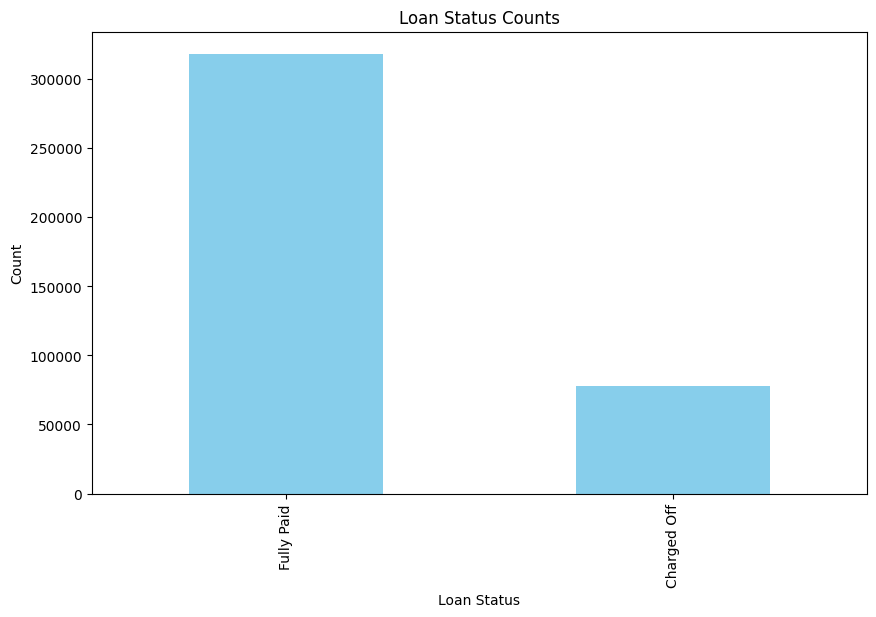

In [497]:
loan_status_counts = data['loan_status'].value_counts()

# Побудова стовпчикової діаграми
plt.figure(figsize=(10, 6))
loan_status_counts.plot(kind='bar', color='skyblue')
plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

<ipython-input-498-bce5f2829710>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='viridis')


<Axes: >

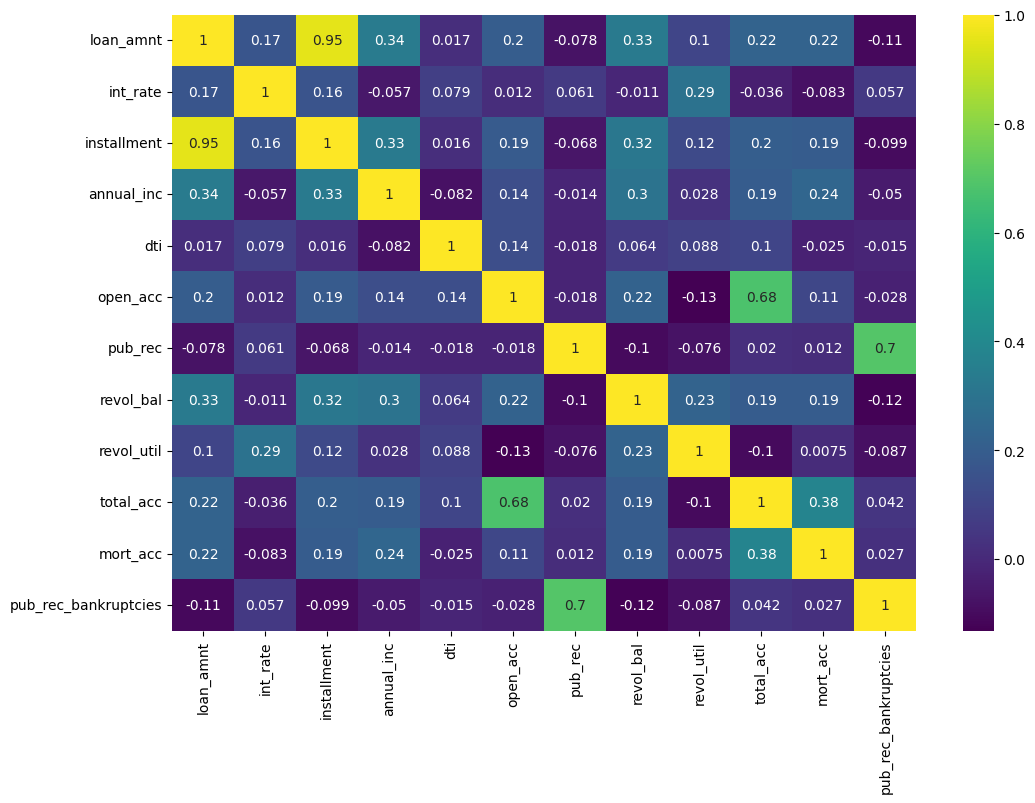

In [498]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

### Notice
Зауважили практично ідеальну кореляцію між ознаками "loan_amnt" та "installment". Давайте дослідимо ці ознаки докладніше. Виведемо їх описи та побудуємо точкову діаграму, щоб візуалізувати їхню взаємозв'язок.

##  `loan_amnt` & `installment`

> - `installment`: Щомісячний платіж, який повинен сплачувати позичальник, якщо позика надається.
> - `loan_amnt`: Зазначена сума позики, на яку претендує позичальник.

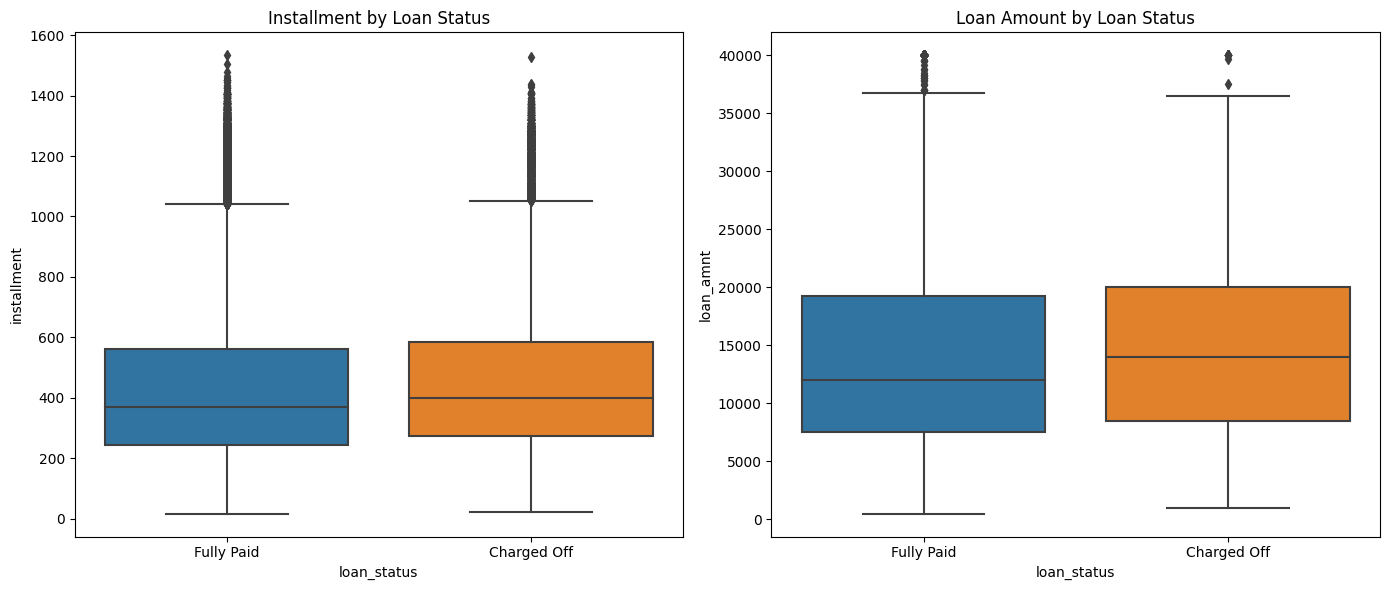

In [499]:
# Ящикова діаграма для 'installment' за 'loan_status'
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status', y='installment', data=data)
plt.title('Installment by Loan Status')

# Ящикова діаграма для 'loan_amnt' за 'loan_status'
plt.subplot(1, 2, 2)
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title('Loan Amount by Loan Status')

plt.tight_layout()
plt.show()

In [500]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.00,15126.30,8505.09,1000.00,8525.00,14000.00,20000.00,40000.00
Fully Paid,318357.00,13866.88,8302.32,500.00,7500.00,12000.00,19225.00,40000.00


##  `grade` & `sub_grade`

> - `grade: Клас позики, визначений LC.
> - `sub_grade: Підклас позики, визначений LC.


Давайте розглянемо стовпці "Grade" та "SubGrade", які LendingClub визначає для позик.



In [501]:
print(f"GRADE unique: {data.grade.unique()}")
print(f"SUB_GRADE unique: {data.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


<Figure size 1200x600 with 0 Axes>

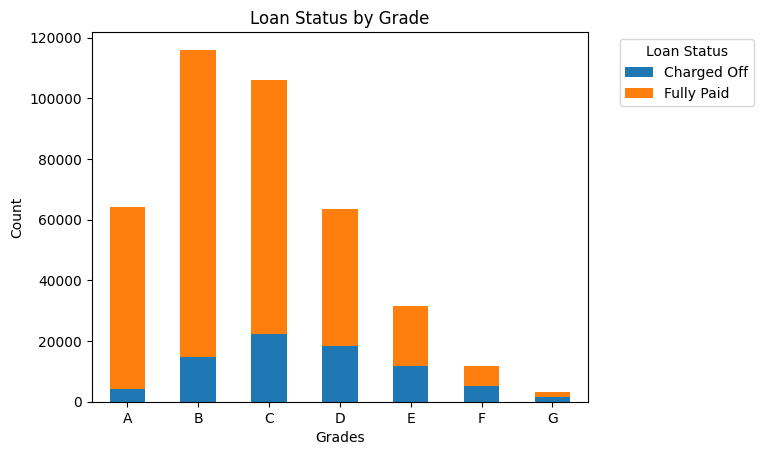

In [502]:


# Підрахунок кількості за кожним статусом для кожного класу 'grade'
grade_counts = data.groupby(['grade', 'loan_status']).size().unstack()

# Побудова стовпчикової діаграми
plt.figure(figsize=(12, 6))
grade_counts.plot(kind='bar', stacked=True)
plt.title('Loan Status by Grade')
plt.xlabel('Grades')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()


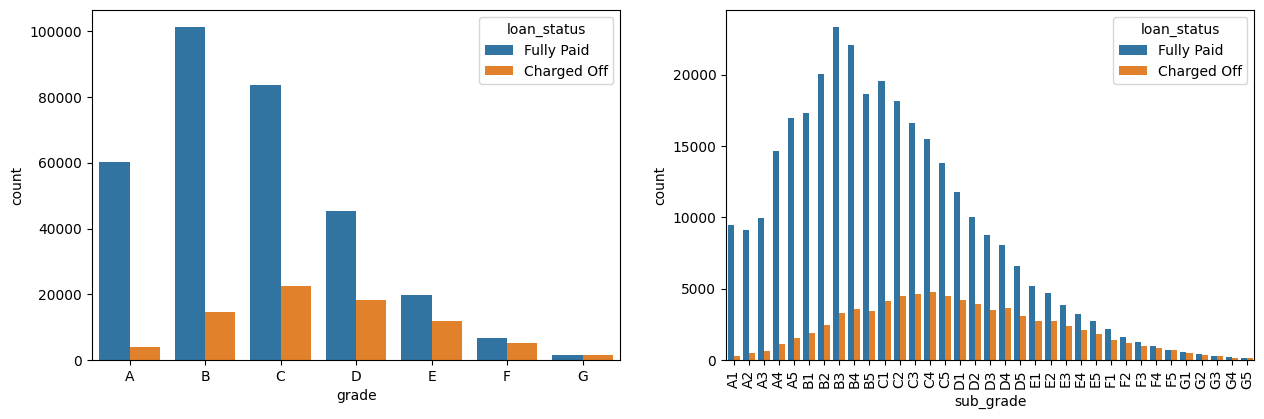

In [503]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Виглядає, що з оцінкою `F` and `G` subgrades не виплачували позику дуже вчасно.

<Axes: xlabel='sub_grade', ylabel='count'>

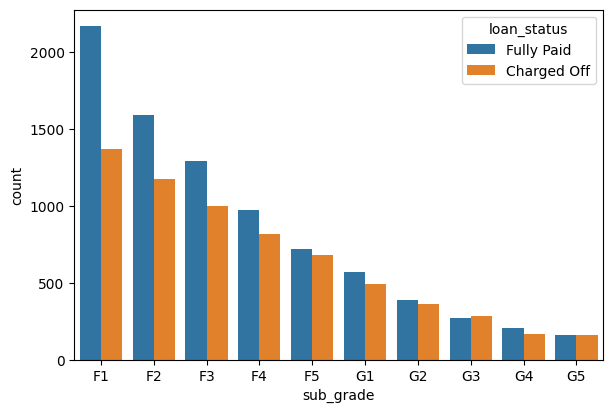

In [504]:
df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

##  `term`, `home_ownership`, `verification_status` & `purpose`

> - `term`: Кількість платежів за позикою в місяцях, може бути 36 або 60.
> - `home_ownership`: Статус власності житла, наданий позичальником при реєстрації (RENT, OWN, MORTGAGE, OTHER).
> - `verification_status`:  Показує, чи був дохід перевірений LC, не перевірений або якщо дохід був перевірений.
> - `purpose`: Категорія, яку вказав позичальник для запиту на позику.

In [505]:
data['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

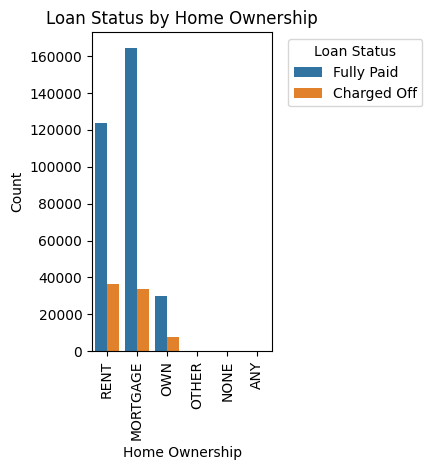

In [506]:

# Побудова діаграми площі
plt.subplot(1, 2, 2)
sns.countplot(x='home_ownership', hue='loan_status', data=data)
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [507]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

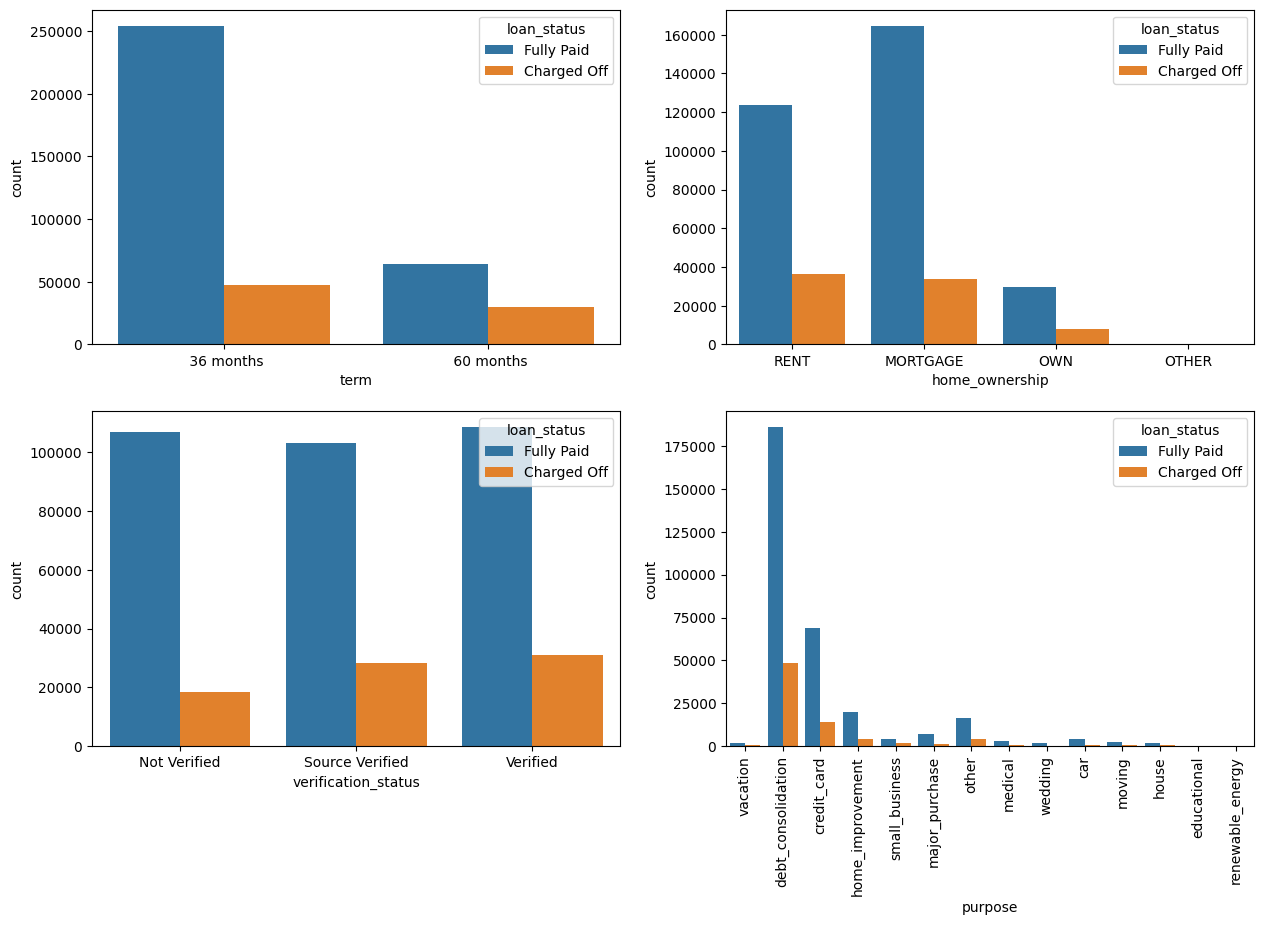

In [508]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [509]:
data.loc[data['home_ownership']=='OTHER', 'loan_status'].value_counts()

Fully Paid     123
Charged Off     23
Name: loan_status, dtype: int64

##  `int_rate` & `annual_inc`

> - `int_rate`: Відсоткова ставка за позикою.
> - `annual_inc`:Річний дохід, який позичальник повідомляє при реєстрації.

In [510]:
print((data[data.annual_inc >= 250000].shape[0] / data.shape[0]) * 100)
print((data[data.annual_inc >= 1000000].shape[0] / data.shape[0]) * 100)

1.0294674645860162
0.018937959245511705


In [511]:
data.loc[data.annual_inc >= 1000000, 'loan_status'].value_counts()

Fully Paid     65
Charged Off    10
Name: loan_status, dtype: int64

In [512]:
data.loc[data.annual_inc >= 250000, 'loan_status'].value_counts()

Fully Paid     3509
Charged Off     568
Name: loan_status, dtype: int64

- It seems that loans with high intersest rate are more likely to be unpaid.
- Only 75 (less then) borrowers have an annual income more than 1 million, and 4077

##  `emp_title` & `emp_length`

> - `emp_title`: The job title supplied by the Borrower when applying for the loan.
> - `emp_length`: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [513]:
print(data.emp_title.isna().sum())
print(data.emp_title.nunique())

22927
173105


In [514]:
data['emp_title'].value_counts()[:20]

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: emp_title, dtype: int64

##  `issue_d`, `earliest_cr_line`

> - `issue_d`: Місяць, в який була фінансована позика.
> - `earliest_cr_line`: Місяць відкриття першої звітної кредитної лінії позичальника.

In [162]:
# data.hvplot.line(x='issue_d', y='loan_status')

In [515]:
data['earliest_cr_line'].value_counts()

Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [516]:
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

## `title`

> - `title`: Заголовок позики, який вказав позичальник.

In [517]:
data.title.isna().sum()

1755

In [518]:
data['title'] = data.title.str.lower()

In [519]:
data.title.value_counts()[:10]

debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
Name: title, dtype: int64

`title` will be removed because we have the `purpose` column with is generated from it.

##  `dti`, `open_acc`, `revol_bal`, `revol_util`, & `total_acc`

> - `dti`:  Відношення загальних щомісячних платежів за всіми зобов'язаннями позичальника до його самозвітуваного щомісячного доходу, за винятком іпотеки та запитаної позики LC.
> - `open_acc`: Кількість відкритих кредитних ліній в кредитному файлі позичальника.
> - `revol_bal`: Загальний оборотний баланс кредиту.
> - `revol_util`: Відсоток використання оборотної кредитної лінії, тобто сума кредиту, яку позичальник використовує відносно всього доступного оборотного кредиту.
> - `total_acc`: Загальна кількість кредитних ліній в кредитному файлі позичальника.

In [520]:
data.dti.value_counts()

0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: dti, Length: 4262, dtype: int64

In [522]:
print(data[data['dti']>=40].shape)

(296, 27)


In [523]:
data.loc[data['dti']>=50, 'loan_status'].value_counts()

Fully Paid     26
Charged Off     9
Name: loan_status, dtype: int64

In [524]:
print(data.shape)
print(data[data.open_acc > 40].shape)

(396030, 27)
(217, 27)


In [525]:
print(data.shape)
print(data[data.total_acc > 80].shape)

(396030, 27)
(266, 27)


In [526]:
print(data.shape)
print(data[data.revol_util > 120].shape)

(396030, 27)
(27, 27)


In [527]:
data[data.revol_util > 200]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
137211,3500.00,36 months,12.49,117.08,B,B4,Budget Analyst,10+ years,RENT,45000.00,Verified,2014-04-01,Fully Paid,debt_consolidation,debt consolidation,14.67,1998-10-01,2.00,0.00,2677.00,892.30,9.00,f,INDIVIDUAL,0.00,0.00,"12506 Connie Burg\nVelasquezfort, TN 00813"


In [528]:
print(data.shape)
print(data[data.revol_bal > 250000].shape)

(396030, 27)
(397, 27)


In [529]:
data.loc[data.revol_bal > 250000, 'loan_status'].value_counts()

Fully Paid     351
Charged Off     46
Name: loan_status, dtype: int64

- It seems that the smaller the `dti` the more likely that the loan will not be paid.
- Only `217` borrower have more than `40` open credit lines.
- Only `266` borrower have more than `80` credit line in the borrower credit file.

##  `pub_rec`, `initial_list_status`, `application_type`, `mort_acc`, & `pub_rec_bankruptcies`

> - `pub_rec`: Кількість негативних громадських записів.
> - `initial_list_status`:  Початковий статус списку позики (можливі значення - W, F).
> - `application_type`: Вказує, чи це індивідуальна заявка на позику чи спільна заявка з двома співпозичальниками.
> - `mort_acc`: Кількість іпотечних рахунків.
> - `pub_rec_bankruptcies`: Кількість банкрутств у громадських записах.

In [530]:
xlabel = 'Number of derogatory public records'
title = "Loan Status by Number of derogatory public records"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'pub_rec'].value_counts().hvplot.bar()
charged_off = data.loc[data['loan_status']=='Charged Off', 'pub_rec'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Pub_rec.I  :Bars   [index]   (pub_rec)
   .Bars.Pub_rec.II :Bars   [index]   (pub_rec)

In [531]:
xlabel = "The initial listing status of the loan"
title = "Loan Status by The initial listing status of the loan"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'initial_list_status'].value_counts().hvplot.bar()
charged_off = data.loc[data['loan_status']=='Charged Off', 'initial_list_status'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Initial_list_status.I  :Bars   [index]   (initial_list_status)
   .Bars.Initial_list_status.II :Bars   [index]   (initial_list_status)

In [532]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'application_type'].value_counts().hvplot.bar()
charged_off = data.loc[data['loan_status']=='Charged Off', 'application_type'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title="Loan Status by Application Type", xlabel="Application Type", ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Application_type.I  :Bars   [index]   (application_type)
   .Bars.Application_type.II :Bars   [index]   (application_type)

In [533]:
xlabel = "Number of public record bankruptcies"
title = "Loan Status by The Number of public record bankruptcies"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'pub_rec_bankruptcies'].value_counts().hvplot.bar()
charged_off = data.loc[data['loan_status']=='Charged Off', 'pub_rec_bankruptcies'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Pub_rec_bankruptcies.I  :Bars   [index]   (pub_rec_bankruptcies)
   .Bars.Pub_rec_bankruptcies.II :Bars   [index]   (pub_rec_bankruptcies)

In [534]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [535]:
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

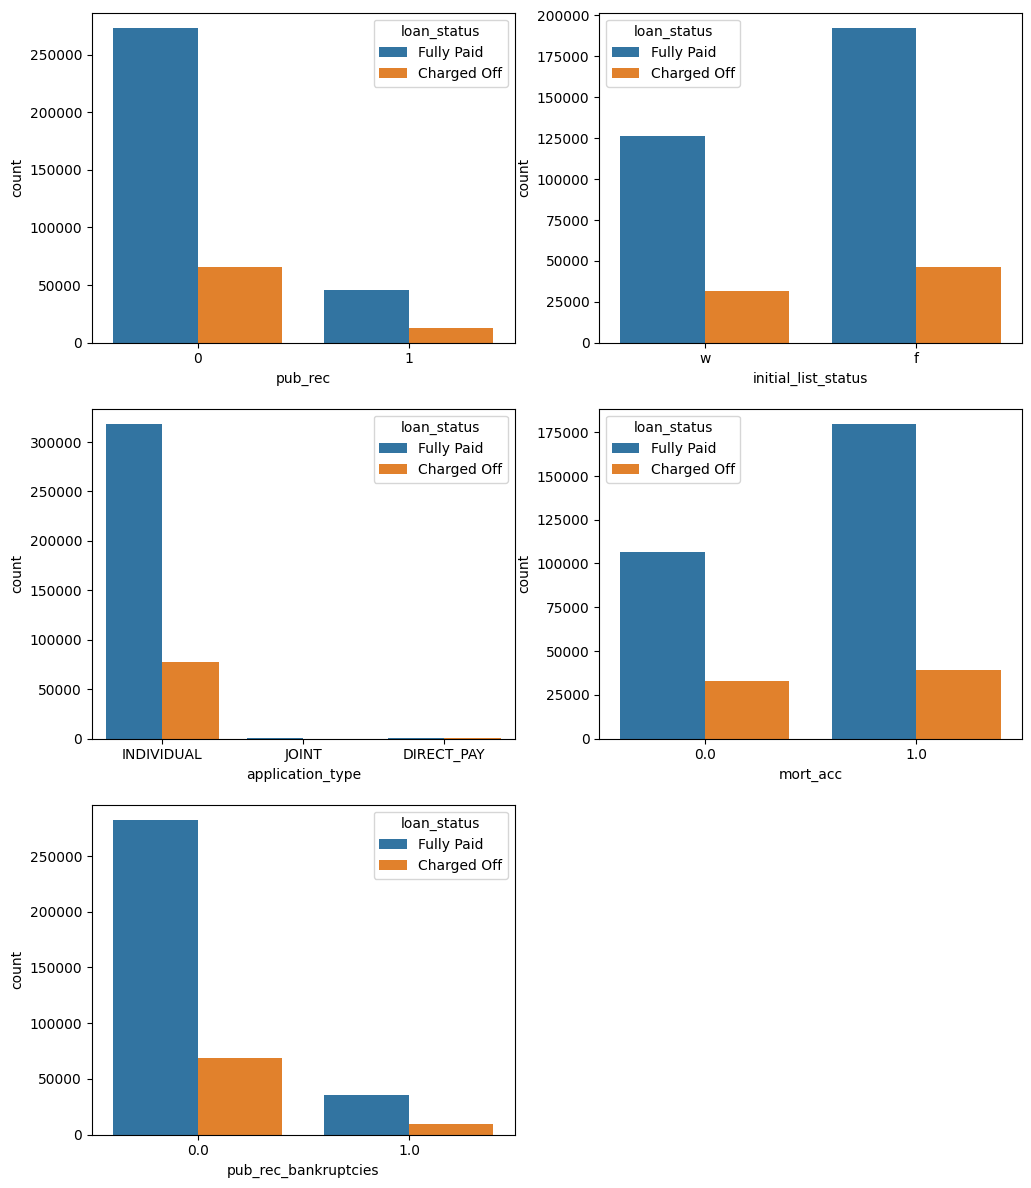

In [536]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

##  Чи корелюють числові дані з категоріальними?

In [537]:
data['loan_status'] = data.loan_status.map({'Fully Paid':1, 'Charged Off':0})

In [538]:
data.corr()['loan_status'].drop('loan_status').sort_values().hvplot.barh(
    width=600, height=400,
    title="Correlation between Loan status and Numeric Features",
    ylabel='Correlation', xlabel='Numerical Features',
)

<ipython-input-538-5c294028a9fd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['loan_status'].drop('loan_status').sort_values().hvplot.barh(


:Bars   [index]   (loan_status)

****
## Висновок:

Ми помічаємо, що існують в основному 2 типи ознак:
Ознаки, пов'язані зі заявником (демографічні змінні, такі як професія, деталі зайнятості і т.д.),
Ознаки, пов'язані з характеристиками позики (сума позики, відсоткова ставка, ціль позики і т.д.).


# Data PreProcessing

**Section Goals:**
> - Видалити або заповнити всі порожні дані.
> - видалити непотрібні та повторювані ознаки.
> - Конвертувати категоріальні рядкові ознаки в фіктивні (dummy) змінні.

In [539]:
# The length of the data
print(f"The Length of the data: {data.shape}")

The Length of the data: (396030, 27)


In [540]:
# Missing values
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1755' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


### `emp_title`

In [541]:
data.emp_title.nunique()

173105

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [542]:
data.drop('emp_title', axis=1, inplace=True)

### `emp_length`

In [543]:
data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [544]:
for year in data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
1   0.82
0   0.18
Name: loan_status, dtype: float64
4 years years in this position:
1   0.81
0   0.19
Name: loan_status, dtype: float64
< 1 year years in this position:
1   0.79
0   0.21
Name: loan_status, dtype: float64
6 years years in this position:
1   0.81
0   0.19
Name: loan_status, dtype: float64
9 years years in this position:
1   0.80
0   0.20
Name: loan_status, dtype: float64
2 years years in this position:
1   0.81
0   0.19
Name: loan_status, dtype: float64
3 years years in this position:
1   0.80
0   0.20
Name: loan_status, dtype: float64
8 years years in this position:
1   0.80
0   0.20
Name: loan_status, dtype: float64
7 years years in this position:
1   0.81
0   0.19
Name: loan_status, dtype: float64
5 years years in this position:
1   0.81
0   0.19
Name: loan_status, dtype: float64
1 year years in this position:
1   0.80
0   0.20
Name: loan_status, dtype: float64
nan years in this position:
Series([], Name: loan_status, dtype: float64)


Charge off rates are extremely similar across all employment lengths. So we are going to drop the `emp_length` column.

In [578]:
data.drop('emp_length', axis=1, inplace=True)

### `title`

In [579]:
data.title.value_counts().head()

AttributeError: ignored

In [546]:
data.purpose.value_counts().head()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: purpose, dtype: int64

The title column is simply a string subcategory/description of the purpose column. So we are going to drop the title column.

In [547]:
data.drop('title', axis=1, inplace=True)

### `mort_acc`

There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach!

Let's review the other columsn to see which most highly correlates to mort_acc

In [548]:
data.mort_acc.value_counts()

1.00    218458
0.00    139777
Name: mort_acc, dtype: int64

In [549]:
data.mort_acc.isna().sum()

37795

<ipython-input-463-c9871d33794e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mort_acc = data.corr()['mort_acc'].drop('mort_acc').sort_values()


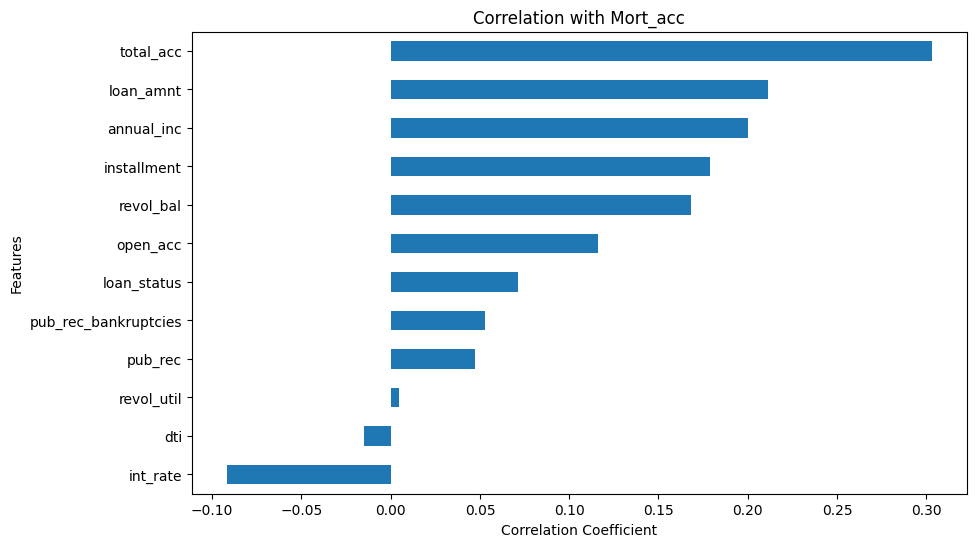

In [463]:
# Обчислення кореляцій для стовбця 'mort_acc' з іншими стовбцями
corr_mort_acc = data.corr()['mort_acc'].drop('mort_acc').sort_values()

# Побудова горизонтальної стовпчикової діаграми
plt.figure(figsize=(10, 6))
corr_mort_acc.plot(kind='barh')
plt.title('Correlation with Mort_acc')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

Здається, що ознака total_acc корелює з mort_acc, це логічно! Давайте спробуємо підхід з заповненням значень fillna(). Ми будемо групувати фрейм даних за total_acc та обчислювати середнє значення mort_acc для кожного входу total_acc.

In [550]:
total_acc_avg = data.groupby(by='total_acc').mean().mort_acc

<ipython-input-550-584fae57b31c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = data.groupby(by='total_acc').mean().mort_acc


In [551]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [552]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

### `revol_util` & `pub_rec_bankruptcies`
These two features have missing data points, but they account for less than 0.5% of the total data. So we are going to remove the rows that are missing those values in those columns with dropna().

In [553]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_length': number of missing values '18301' ==> '4.621%'
'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [554]:
data.dropna(inplace=True)

In [555]:
data.shape

(376929, 25)

##  Categorical Variables and Dummy Variables

In [556]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'address']


### `term`

In [557]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [558]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [559]:
data.term.unique()

array([36, 60])

### `grade` & `sub_grade`

We know that `grade` is just a sub feature of `sub_grade`, So we are goinig to drop it.

In [560]:
data.drop('grade', axis=1, inplace=True)

In [561]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status',
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

### `address`
We are going to feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [562]:
data.address.head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [563]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [564]:
data.zip_code.value_counts()

70466    54212
30723    53792
22690    53779
48052    53270
00813    43807
29597    43515
05113    43380
11650    10483
93700    10414
86630    10277
Name: zip_code, dtype: int64

In [565]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)

In [566]:
data.drop('address', axis=1, inplace=True)

### `issue_d`

This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [567]:
data.drop('issue_d', axis=1, inplace=True)

### `earliest_cr_line`
This appears to be a historical time stamp feature. Extract the year from this feature using a `.apply()` function, then convert it to a numeric feature.

In [568]:
data['earliest_cr_line'] = data.earliest_cr_line.dt.year

In [569]:
data.earliest_cr_line.nunique()

65

In [570]:
data.earliest_cr_line.value_counts()

2000    28269
2001    28074
1999    25440
2002    25053
2003    22904
        ...  
1954        2
1953        1
1944        1
1951        1
1948        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [ ]:
#data.drop('earliest_cr_line', axis=1, inplace=True)

##  Check for duplicates columns & features

In [ ]:
# print(f"Data shape: {data.shape}")

# # Remove duplicate Features
# data = data.T.drop_duplicates()
# data = data.T

# # Remove Duplicate Rows
# data.drop_duplicates(inplace=True)

# print(f"Data shape: {data.shape}")

## Train Test Split

In [669]:
w_p = data.loan_status.value_counts()[1] / data.shape[0]
w_n = data.loan_status.value_counts()[0] / data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.8076852669866208
Weight of negative values 0.19231473301337917


In [670]:
train, test = train_test_split(data, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

(252542, 79)
(124387, 79)


# Removing Outliers

In [671]:
print(train[train['dti'] <= 50].shape)
print(train.shape)

(252528, 79)
(252542, 79)


In [672]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

(252542, 79)
(249916, 79)


##  Normalizing the data

In [673]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [674]:
X_train.dtypes

loan_amnt         float64
term                int64
int_rate          float64
installment       float64
annual_inc        float64
                   ...   
zip_code_30723      uint8
zip_code_48052      uint8
zip_code_70466      uint8
zip_code_86630      uint8
zip_code_93700      uint8
Length: 78, dtype: object

In [675]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Models Building

In [676]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [677]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

#  XGBoost Classifier

In [678]:
# param_grid = dict(
#     n_estimators=stats.randint(10, 500),
#     max_depth=stats.randint(1, 10),
#     learning_rate=stats.uniform(0, 1)
# )

xgb_clf = XGBClassifier(use_label_encoder=False)
# xgb_cv = RandomizedSearchCV(
#     xgb_clf, param_grid, cv=3, n_iter=60,
#     scoring='roc_auc', n_jobs=-1, verbose=1
# )
# xgb_cv.fit(X_train, y_train)

# best_params = xgb_cv.best_params_
# best_params['tree_method'] = 'gpu_hist'
# # best_params = {'n_estimators': 50, 'tree_method': 'gpu_hist'}
# print(f"Best Parameters: {best_params}")

# xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 89.76%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.94      0.89      0.90       0.92          0.90
recall        0.50      0.99      0.90       0.75          0.90
f1-score      0.65      0.94      0.90       0.80          0.88
support   48325.00 201591.00      0.90  249916.00     249916.00
_______________________________________________
Confusion Matrix: 
 [[ 24174  24151]
 [  1441 200150]]

Test Result:
Accuracy Score: 89.11%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.91      0.89      0.89       0.90          0.89
recall        0.48      0.99      0.89       0.73          0.89
f1-score      0.63      0.94      0.89       0.78          0.88
support   23803.00 100584.00      0.89  124387.00     124387.00
_________________________________________

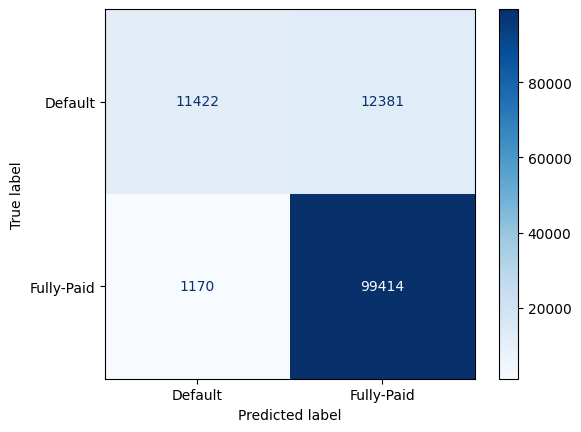

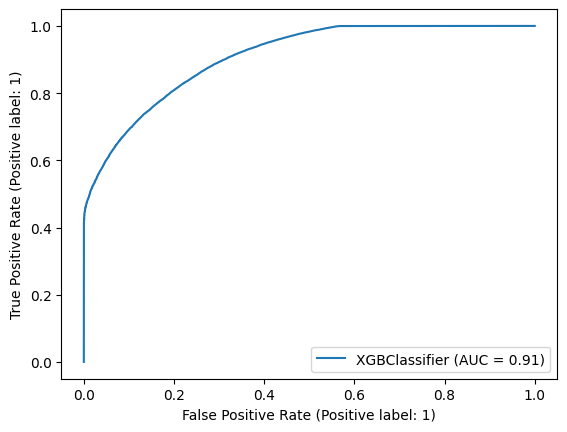

In [679]:
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)

#Modifying xgb

In [680]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE, mutual_info_classif
import pandas as pd
from sklearn.metrics import accuracy_score



###A-B

In [681]:
# Крок 1: Алгоритми відбору ознак
# (a) UFS-XGBoost
ufs = SelectKBest(f_classif, k=5)  # Змініть 'k', якщо потрібно
#ufs = SelectKBest(mutual_info_classif, k=5)  # Змініть 'k', якщо потрібно
X_train_ufs = ufs.fit_transform(X_train, y_train)
X_test_ufs = ufs.transform(X_test)








In [683]:
# (b) FIDT-XGBoost
fidt = DecisionTreeClassifier()#max_depth=15)
fidt.fit(X_train, y_train)
importances = fidt.feature_importances_
features_to_keep = importances.argsort()[-5:]  # кількість ознак, які слід залишити
X_train_fidt = X_train[:, features_to_keep]
X_test_fidt = X_test[:, features_to_keep]

##C

In [684]:
# (c) RFE-XGBoost

rfe = RFE(estimator=XGBClassifier(use_label_encoder=False), n_features_to_select=5)  #  кількість ознак, які слід вибрати
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)




###c(RFE_modified)

In [659]:
#с) modified
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
# Create an XGBoost classifier
estimator = XGBClassifier(use_label_encoder=False)

# Create an RFE model with cross-validated score
rfe = RFE(estimator=estimator, n_features_to_select=10)

# Create a cross-validated scoring strategy (e.g., roc_auc)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fit the RFE model using cross-validated score
X_train_rfe = rfe.fit_transform(X_train, y_train)
scores = cross_val_score(estimator, X_train_rfe, y_train, cv=cv, scoring='roc_auc')


In [660]:
# Output the mean cross-validated score
print("Mean ROC-AUC:", scores.mean())

# Transform the test set
X_test_rfe = rfe.transform(X_test)

Mean ROC-AUC: 0.8978619794990307


##D

In [685]:
# (d) IV-XGBoost
iv = SelectKBest(mutual_info_classif, k=5)  #  'k'
#iv = SelectKBest(f_classif, k=10)  #  'k'
X_train_iv = iv.fit_transform(X_train, y_train)
X_test_iv = iv.transform(X_test)

##results

In [687]:
# Крок 2:
xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [688]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Зберігання точності для кожного алгоритму
results = []

In [689]:
# Крок 3: Оцініть класифікатор XGBoost
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print("Базовий XGBoost:")
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)
accuracy_base = accuracy_score(y_test, y_test_pred)
results.append(('Baseline XGBoost', accuracy_base))

Базовий XGBoost:
Train Result:
Accuracy Score: 89.76%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.94      0.89      0.90       0.92          0.90
recall        0.50      0.99      0.90       0.75          0.90
f1-score      0.65      0.94      0.90       0.80          0.88
support   48325.00 201591.00      0.90  249916.00     249916.00
_______________________________________________
Confusion Matrix: 
 [[ 24174  24151]
 [  1441 200150]]

Test Result:
Accuracy Score: 89.11%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.91      0.89      0.89       0.90          0.89
recall        0.48      0.99      0.89       0.73          0.89
f1-score      0.63      0.94      0.89       0.78          0.88
support   23803.00 100584.00      0.89  124387.00     124387.00
________________________

In [690]:
# Оцінка UFS-XGBoost
print("\nUFS-XGBoost:")
xgb_ufs = XGBClassifier(use_label_encoder=False)
xgb_ufs.fit(X_train_ufs, y_train)
y_test_ufs_pred = xgb_ufs.predict(X_test_ufs)
print_score(y_test, y_test_ufs_pred, train=False)
accuracy_ufs = accuracy_score(y_test, y_test_ufs_pred)
results.append(('UFS-XGBoost', accuracy_ufs))


UFS-XGBoost:
Test Result:
Accuracy Score: 89.10%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      0.88      0.89       0.94          0.90
recall        0.43      1.00      0.89       0.72          0.89
f1-score      0.60      0.94      0.89       0.77          0.87
support   23803.00 100584.00      0.89  124387.00     124387.00
_______________________________________________
Confusion Matrix: 
 [[ 10242  13561]
 [     0 100584]]



In [691]:
# Оцінка FIDT-XGBoost
print("\nFIDT-XGBoost:")
xgb_fidt = XGBClassifier(use_label_encoder=False)
xgb_fidt.fit(X_train_fidt, y_train)
y_test_fidt_pred = xgb_fidt.predict(X_test_fidt)
print_score(y_test, y_test_fidt_pred, train=False)
accuracy_fidt = accuracy_score(y_test, y_test_fidt_pred)
results.append(('FIDT-XGBoost', accuracy_fidt))


FIDT-XGBoost:
Test Result:
Accuracy Score: 89.07%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.99      0.88      0.89       0.94          0.90
recall        0.43      1.00      0.89       0.72          0.89
f1-score      0.60      0.94      0.89       0.77          0.87
support   23803.00 100584.00      0.89  124387.00     124387.00
_______________________________________________
Confusion Matrix: 
 [[ 10275  13528]
 [    70 100514]]



In [692]:
# Оцінка RFE-XGBoost
print("\nRFE-XGBoost:")
xgb_rfe = XGBClassifier(use_label_encoder=False)
xgb_rfe.fit(X_train_rfe, y_train)
y_test_rfe_pred = xgb_rfe.predict(X_test_rfe)
print_score(y_test, y_test_rfe_pred, train=False)
accuracy_rfe = accuracy_score(y_test, y_test_rfe_pred)
results.append(('RFE-XGBoost', accuracy_rfe))



RFE-XGBoost:
Test Result:
Accuracy Score: 89.10%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      0.88      0.89       0.94          0.90
recall        0.43      1.00      0.89       0.72          0.89
f1-score      0.60      0.94      0.89       0.77          0.87
support   23803.00 100584.00      0.89  124387.00     124387.00
_______________________________________________
Confusion Matrix: 
 [[ 10242  13561]
 [     0 100584]]



In [693]:
# Оцінка IV-XGBoost
print("\nIV-XGBoost:")
xgb_iv = XGBClassifier(use_label_encoder=False)
xgb_iv.fit(X_train_iv, y_train)
y_test_iv_pred = xgb_iv.predict(X_test_iv)
print_score(y_test, y_test_iv_pred, train=False)
accuracy_iv = accuracy_score(y_test, y_test_iv_pred)
results.append(('IV-XGBoost', accuracy_iv))


IV-XGBoost:
Test Result:
Accuracy Score: 89.10%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      0.88      0.89       0.94          0.90
recall        0.43      1.00      0.89       0.72          0.89
f1-score      0.60      0.94      0.89       0.77          0.87
support   23803.00 100584.00      0.89  124387.00     124387.00
_______________________________________________
Confusion Matrix: 
 [[ 10242  13561]
 [     0 100584]]



#  Comparing Models Prerformance

In [644]:
#DataFrame
df_results = pd.DataFrame(results, columns=['Algorithm', 'Accuracy'])

# Результат
print(df_results)

          Algorithm  Accuracy
0  Baseline XGBoost      0.89
1       UFS-XGBoost      0.89
2      FIDT-XGBoost      0.89
3       RFE-XGBoost      0.89
4        IV-XGBoost      0.89


#  Artificial Neural Networks (ANNs)

In [254]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [255]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns,
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
8192/8192 [==============================] - 59s 7ms/step - loss: 0.3078 - AUC: 0.8613 - val_loss: 0.2684 - val_AUC: 0.8983
Epoch 2/20
8192/8192 [==============================] - 43s 5ms/step - loss: 0.2916 - AUC: 0.8770 - val_loss: 0.2644 - val_AUC: 0.9032
Epoch 3/20
8192/8192 [==============================] - 38s 5ms/step - loss: 0.2863 - AUC: 0.8821 - val_loss: 0.2604 - val_AUC: 0.9046
Epoch 4/20
8192/8192 [==============================] - 39s 5ms/step - loss: 0.2826 - AUC: 0.8856 - val_loss: 0.2616 - val_AUC: 0.9044
Epoch 5/20
8192/8192 [==============================] - 36s 4ms/step - loss: 0.2813 - AUC: 0.8866 - val_loss: 0.2658 - val_AUC: 0.9054
Epoch 6/20
8192/8192 [==============================] - 35s 4ms/step - loss: 0.2807 - AUC: 0.8876 - val_loss: 0.2614 - val_AUC: 0.9053
Epoch 7/20
8192/8192 [==============================] - 39s 5ms/step - loss: 0.2797 - AUC: 0.8889 - val_loss: 0.2608 - val_AUC: 0.9060
Epoch 8/20
8192/8192 [==============================] -

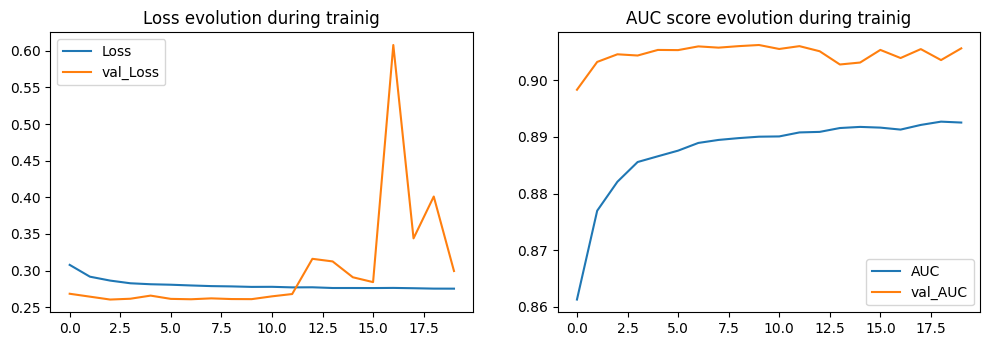

In [256]:
plot_learning_evolution(r)

In [257]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

8192/8192 [==============================] - 14s 2ms/step
Train Result:
Accuracy Score: 88.85%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.92      0.89      0.89       0.90          0.89
recall        0.48      0.99      0.89       0.73          0.89
f1-score      0.63      0.93      0.89       0.78          0.87
support   51665.00 210478.00      0.89  262143.00     262143.00
_______________________________________________
Confusion Matrix: 
 [[ 24597  27068]
 [  2168 208310]]



In [258]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

4076/4076 [==============================] - 6s 2ms/step
Test Result:
Accuracy Score: 88.86%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.91      0.89      0.89       0.90          0.89
recall        0.47      0.99      0.89       0.73          0.89
f1-score      0.62      0.93      0.89       0.78          0.87
support   25480.00 104943.00      0.89  130423.00     130423.00
_______________________________________________
Confusion Matrix: 
 [[ 12103  13377]
 [  1151 103792]]



#  Random Forest Classifier

In [260]:
# param_grid = dict(
#     n_estimators=stats.randint(100, 1500),
#     max_depth=stats.randint(10, 100),
#     min_samples_split=stats.randint(1, 10),
#     min_samples_leaf=stats.randint(1, 10),
# )

rf_clf = RandomForestClassifier(n_estimators=100)
# rf_cv = RandomizedSearchCV(
#     rf_clf, param_grid, cv=3, n_iter=60,
#     scoring='roc_auc', n_jobs=-1, verbose=1
# )
# rf_cv.fit(X_train, y_train)
# best_params = rf_cv.best_params_
# print(f"Best Parameters: {best_params}")
# rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      1.00      1.00       1.00          1.00
recall        1.00      1.00      1.00       1.00          1.00
f1-score      1.00      1.00      1.00       1.00          1.00
support   51665.00 210478.00      1.00  262143.00     262143.00
_______________________________________________
Confusion Matrix: 
 [[ 51663      2]
 [     0 210478]]

Test Result:
Accuracy Score: 88.94%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.96      0.88      0.89       0.92          0.90
recall        0.46      0.99      0.89       0.73          0.89
f1-score      0.62      0.94      0.89       0.78          0.87
support   25480.00 104943.00      0.89  130423.00     130423.00
________________________________________

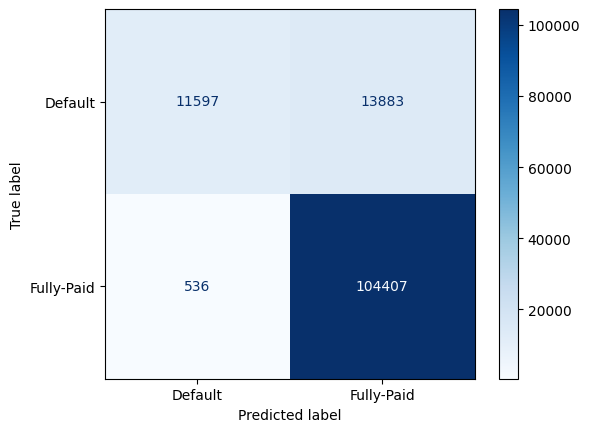

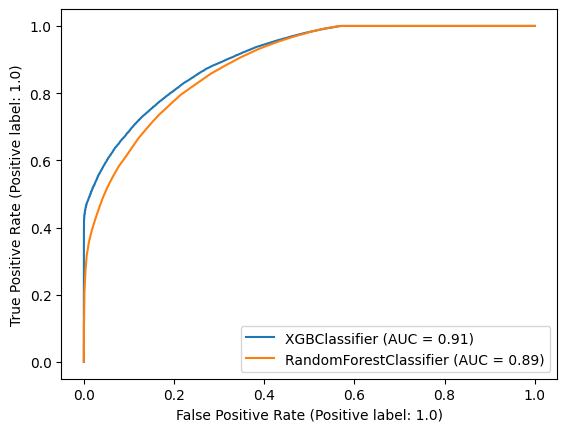

In [261]:
disp = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test,
                             cmap='Blues', values_format='d',
                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)

#Another Model Building

In [262]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score_another(label, prediction, train=True):
    if train:
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")

    elif train==False:
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

In [263]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [264]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [265]:
model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(56, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(28, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

In [267]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=20,
              class_weight={0:1, 1:2})

Epoch 1/20
8192/8192 [==============================] - 38s 4ms/step - loss: 0.4373 - accuracy: 0.8649 - val_loss: 0.2818 - val_accuracy: 0.8884
Epoch 2/20
8192/8192 [==============================] - 27s 3ms/step - loss: 0.3648 - accuracy: 0.8870 - val_loss: 0.2767 - val_accuracy: 0.8884
Epoch 3/20
8192/8192 [==============================] - 34s 4ms/step - loss: 0.3507 - accuracy: 0.8874 - val_loss: 0.2717 - val_accuracy: 0.8884
Epoch 4/20
8192/8192 [==============================] - 28s 3ms/step - loss: 0.3442 - accuracy: 0.8874 - val_loss: 0.2727 - val_accuracy: 0.8884
Epoch 5/20
8192/8192 [==============================] - 28s 3ms/step - loss: 0.3400 - accuracy: 0.8876 - val_loss: 0.2732 - val_accuracy: 0.8884
Epoch 6/20
8192/8192 [==============================] - 28s 3ms/step - loss: 0.3380 - accuracy: 0.8875 - val_loss: 0.2744 - val_accuracy: 0.8884
Epoch 7/20
8192/8192 [==============================] - 32s 4ms/step - loss: 0.3361 - accuracy: 0.8876 - val_loss: 0.2721 - val_ac

In [268]:
training_score = model.evaluate(X_train, y_train)
testing_score = model.evaluate(X_test, y_test)

print(f"TRAINING SCORE: {training_score}")
print(f"TESTING SCORE: {testing_score}")

4076/4076 [==============================] - 6s 2ms/step - loss: 0.2788 - accuracy: 0.8884
TRAINING SCORE: [0.2754474878311157, 0.8875461220741272]
TESTING SCORE: [0.2787647545337677, 0.8884169459342957]


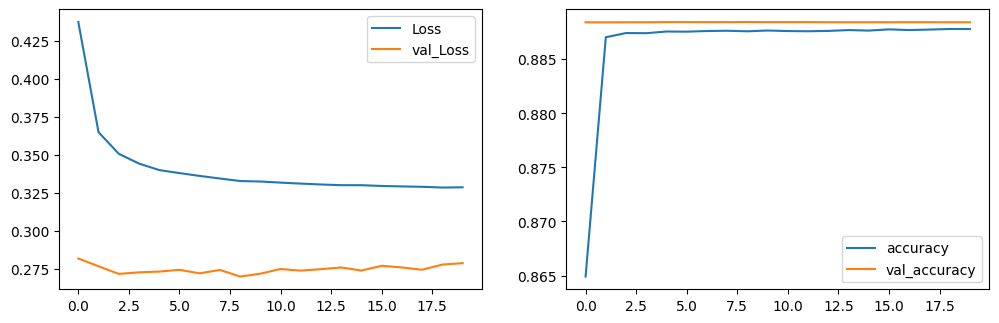

In [269]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [695]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

3888/3888 [==============================] - 5s 1ms/step
Train Result:
Accuracy Score: 88.98%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      0.88      0.89       0.94          0.90
recall        0.43      1.00      0.89       0.71          0.89
f1-score      0.60      0.94      0.89       0.77          0.87
support   48325.00 201591.00      0.89  249916.00     249916.00
_______________________________________________
Confusion Matrix: 
 [[ 20775  27550]
 [     0 201591]]

Test Result:
Accuracy Score: 89.09%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      0.88      0.89       0.94          0.90
recall        0.43      1.00      0.89       0.72          0.89
f1-score      0.60      0.94      0.89       0.77          0.87
support   23803.00 100584.00      0.89  124387.0